# Property Sale Data Analysis

In this notebook, we will analyze the MA property sale data we have downloaded, for the towns we are interested in.

First, we will load the data we have downloaded:

In [1]:

import pandas as pd
df = pd.read_excel('data/LA3ParcelSearch.xlsx', skiprows=4, parse_dates=["Sale Date"])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29438 entries, 0 to 29437
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   City/ Town              29438 non-null  object        
 1   Fiscal Year             29438 non-null  int64         
 2   Process                 29438 non-null  object        
 3   Sale Date               29438 non-null  datetime64[ns]
 4   Parcel Id               29438 non-null  object        
 5   Seller                  29425 non-null  object        
 6   Buyer                   29438 non-null  object        
 7   St Num                  28941 non-null  object        
 8   St Alpha                9436 non-null   object        
 9   St Name                 29438 non-null  object        
 10  Use Code                29438 non-null  int64         
 11  NAL Code                16742 non-null  object        
 12  Sale Price              29438 non-null  int64 

,City/ Town,Fiscal Year,Process,Sale Date,Parcel Id,Seller,Buyer,St Num,St Alpha,St Name,Use Code,NAL Code,Sale Price,Prior Assessed Value,Current Assessed Value,A/S Ratio,Location Id
0,Colrain,2004,C,2001-01-05,108_14,REID BRIAN S & JESSICA E,HERZIG GARY,13,NaN,CHURCH ST,104,NaN,96900,113100,103100,1.06,NaN
1,Bernardston,2004,C,2001-01-11,7_5_1.5,"GIARD, LAWRENCE E","COOK, ROBERT S",0,NaN,DEACON PARKER RD,321,N,180000,103400,121700,0.68,NaN
2,Northfield,2004,C,2001-01-12,31A_A34,LAWLER ALAN G,MESSER GREGORY E,40,NaN,MAPLE ST,104,NaN,225000,175100,218600,0.97,NaN
3,Buckland,2004,C,2001-01-14,5_13-2,RUSSELL,LIVELY,88,NaN,E BUCKLAND RD,131,O,16900,120800,30600,1.81,NaN
4,Bernardston,2004,C,2001-01-19,9_2_9,"SANDRI, DEVELOPMENT","CRUMPIN-FOX CLUB, INC",87,NaN,NORTHFIELD RD,391,B,360000,33800,50000,0.14,NaN


Now, lets do some preliminary analysis to see the distribution of it.

[Text(0.5, 1.0, '# of Sales by Date and Town')]

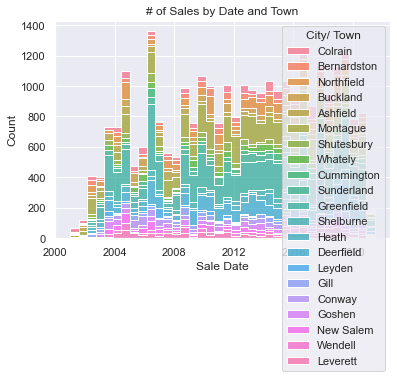

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200
sns.set(rc={'figure.figsize':(20,10)})

sns.histplot(df, x='Sale Date', hue='City/ Town', multiple="stack", element='step').set(
    title="# of Sales by Date and Town"
)

Now let's evaluate how the sale price compares to the assessed price:

In [12]:
reduced = df.query("10000 < `Sale Price` < 500000 and 10000 < `Prior Assessed Value` < 500000")

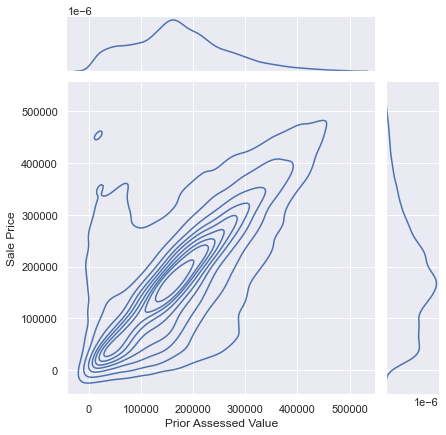

In [14]:
sns.jointplot(x="Prior Assessed Value", y="Sale Price", data=reduced, kind='kde')


<AxesSubplot:xlabel='Assessed / Sale', ylabel='Count'>

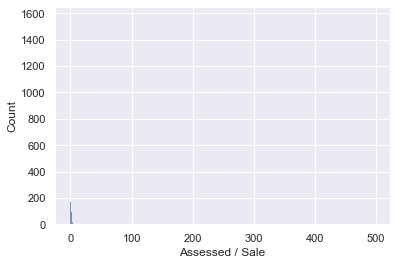

In [4]:
df['Assessed / Sale'] = df['Prior Assessed Value'] / df['Sale Price']
sns.histplot(data=df, x="Assessed / Sale")

OK, let's remove some outliers...

<AxesSubplot:xlabel='Assessed / Sale', ylabel='Density'>

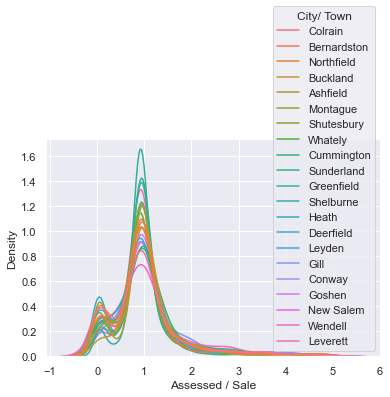

In [5]:
sns.kdeplot(data=reduced.query("`Assessed / Sale` < 5"), x='Assessed / Sale', hue='City/ Town', common_norm=False)

Now let's try to fit a model on this!    

In [2]:
import bambi as bmb
import arviz as az

model = bmb.Model("'Sale Price' ~ 'Prior Assessed Value'", df)
results = model.fit(draws=5000, chains=2)
az.plot_trace(results)
az.summary(results)

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.



You can find the C code in this temporary file: /var/folders/xn/05ktz3056kqd9n8frgd6236h0000gn/T/theano_compilation_error_nvuc52rh


Exception: ("Compilation failed (return status=1): In file included from /Users/saul/.theano/compiledir_macOS-12.4-x86_64-i386-64bit-i386-3.9.13-64/tmpxg2twxjz/mod.cpp:1:. In file included from /usr/local/Caskroom/miniconda/base/envs/property-data/include/python3.9/Python.h:25:. /usr/local/Caskroom/miniconda/base/envs/property-data/bin/../include/c++/v1/stdio.h:107:15: fatal error: 'stdio.h' file not found. #include_next <stdio.h>.               ^~~~~~~~~. 1 error generated.. ", 'FunctionGraph(Elemwise{true_div,no_inplace}(TensorConstant{1.0}, TensorConstant{2.28983881..188535e-13}))')